# 4章 データの表現と特徴量エンジニアリング

##### 連続値特徴量（continuous feature）
データが2次元の浮動小数点配列など．
##### カテゴリ特徴量（categorical feature）離散値特徴量(（descrete feature）
すべてを表現するものが数値などのように連続的に変化するものではない．

データを構成する特徴量のタイプによらず．特徴量の表現は機械学習モデルの性能に多大な影響を及ぼす．データのスケール変換，特徴量の強化など，効果的で必要不可欠な処理がある．
##### 特徴量エンジニアリング（feature engineering）
特定のアプリケーションに対して，最良のデータ表現を模索すること．教師あり学習では，データを正しく表現することが，パラメータを適切に選ぶこと以上に大きな影響を与えることがある．

## 4.1 カテゴリ変数

### 4.1.1 ワンホットエンコーディング（ダミー変数）

##### ダミー変数，ワンホットエンコーディング
カテゴリ変数を1つ以上の0と1の値を持つ新しい特徴量で置き換えるもの．
##### カテゴリ変数をワンホットエンコーディングに変換する2つの方法
pandasを使う方法とscikit-learnを使う方法．

In [1]:
import pandas as pd
import os
import mglearn
# このファイルにはコラム名を含んだヘッダがないので，header=Noneを指定．
# コラム名を"names"で明示的に指定
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 解説のために，いくつかのカラムだけを選択
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
                'occupation', 'income']]
# IPython.displayを使うと，Jupyter notebook で綺麗な出力が得られる
display(data.head())

Duplicate key in file WindowsPath('C:/Users/81804/anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  sans-serif')


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### 4.1.1.1 文字列で表されているカテゴリデータのチェック

In [2]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [3]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [4]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy配列を取り出す
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))
print(type(X))
print(type(y))

X.shape: (32561, 44) y.shape: (32561,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


C:\Users\81804\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4.1.2 数値でエンコードされているカテゴリ

In [7]:
# 整数特徴量とカテゴリ文字列特徴量からなるDataFrameをつくる
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [8]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [9]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 4.2 ビニング，離散化，線形モデル，決定木

##### 非常に広く利用される2つのアルゴリズムファミリー
線形モデルと決定木ベースのモデル（決定木，勾配ブースティング決定木，ランダムフォレスト）は，特徴量の相違に関しては非常に異なる性質を持つ．
##### wave回帰データセット

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


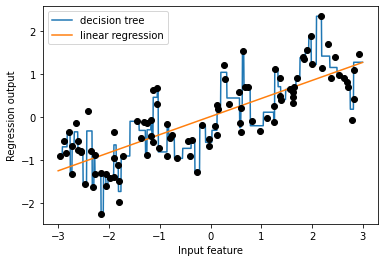

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')

##### 線形モデルを連続データに対してより強力にする方法の1つ
特徴量のビニング(binning),離散化(descretization)が挙げられる．

In [11]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


##### 上記セルがしたこと
waveデータセットの単一の連続値入力特徴量の，どのビンにデータポイントが入っているかを表現したカテゴリ特徴量への置き換え．このデータをscikit-learnモデルで扱うには，この離散値特徴量をワンホットエンコーディングに変換する必要がある．

In [12]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoderで変換する
encoder = OneHotEncoder(sparse=False)
# encoder.fitでwhich_binに現れる整数値のバリエーションを確認
encoder.fit(which_bin)
# transformでワンホットエンコーディングを行う．
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

print("X_binned.shape: {}".format(X_binned.shape))

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

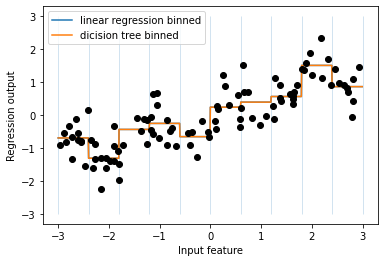

In [13]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="linear regression binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="dicision tree binned")
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

## 4.3 交互作用と多項式

##### 交互作用特徴量（interaction feature）と多項式特徴量（polynomial feature）
特に線形モデルにおいて有用．このような特徴量エンジニアリングは，統計モデルでよく用いられるが，多くの実用的な機械学習アプリケーションでも一般的に用いられている．

X.shape: (100, 1)
X_binned.shape: (100, 10)
line shape: (1000, 1)
line_binned shape: (1000, 10)
X_combined.shape: (100, 11)
line_combined.shape: (1000, 11)


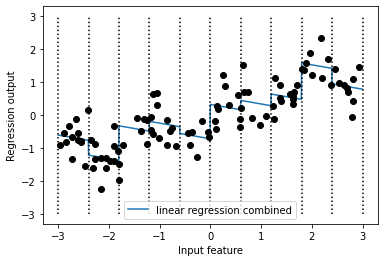

In [14]:
print("X.shape: {}".format(X.shape))
print("X_binned.shape: {}".format(X_binned.shape))
print("line shape: {}".format(line.shape))
print("line_binned shape: {}".format(line_binned.shape))

X_combined = np.hstack([X, X_binned])
line_combined = np.hstack([line, line_binned])

print("X_combined.shape: {}".format(X_combined.shape))
print("line_combined.shape: {}".format(line_combined.shape))

reg = LinearRegression().fit(X_combined, y)
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

(100, 20)


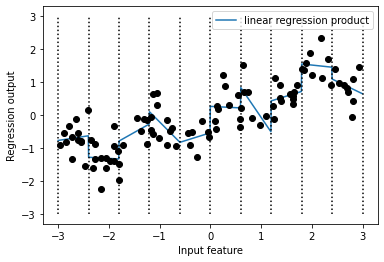

In [15]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# x**10までの多項式を加える．
# デフォルトの"include_bias=True"だと，常に1となる特徴量を加える
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: {}".format(X_poly.shape))

# 内容の比較
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))
# 個々の特徴量の意味
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

X_poly.shape: (100, 10)
Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
Polynomial feature names:
['x0'

##### 多項式特徴量を線形回帰モデルと組み合わせると，古典的な多項式回帰（polynomial regression）モデルになる．

カーネル法を用いたSVMモデルを変換していないオリジナルデータに適用


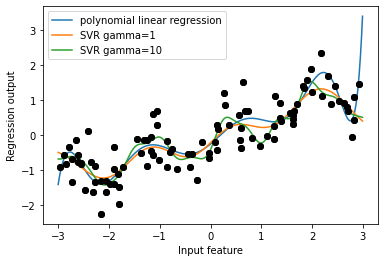

In [17]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

print("カーネル法を用いたSVMモデルを変換していないオリジナルデータに適用")

from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [18]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0
)

# データのスケール変換
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2次までの多項式特徴量と相互作用を抽出する
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)
Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x

In [19]:
# Ridgeで比較
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)
))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)
))

Score without interactions: 0.621
Score without interactions: 0.753


In [20]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)
))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    rf.score(X_test_poly, y_test)
))

Score without interactions: 0.798
Score with interactions: 0.758


## 4.4 単変量非線形変換

特徴量を2,3乗したものが，線形回帰モデルで有用であることを確認した．他に特定の特徴量に有用であることがわかっている変換がある．
##### 数学関数による変換
### $log, exp, sin, cos$など 

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

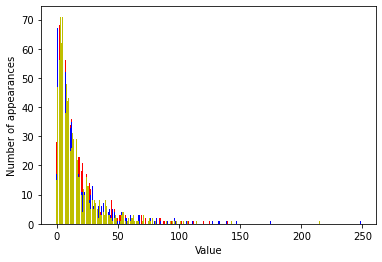

In [21]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

# 可視化 X[:, 0]
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='r')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
print(bins)
# 可視化 X[:, 1]
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
# 可視化 X[:, 0]
bins = np.bincount(X[:, 2])
plt.bar(range(len(bins)), bins, color='y')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [22]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


Test score: 0.875


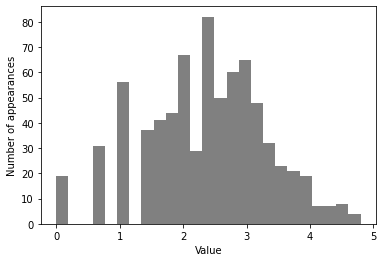

In [23]:
# 対数変換
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

## 4.5 自動特徴量選択

### 4.5.1 単変量統計

##### 単変量統計
個々の特徴量とターゲットとの間に統計的に顕著な関係があるかどうかを計算する．そして最も高い確信度で関連している特徴量が選択される．
##### 分散分析（analysis of variance: ANOVA）
クラス分類問題における単変量統計の呼称．

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

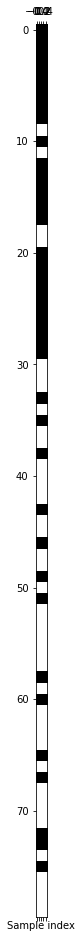

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# シードを指定して乱数を決定
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# ノイズ特徴量をデータに加える
# 最初の30特徴量はデータセットから来たもの，続く50特徴量はノイズ
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5
)
# f_classif(デフォルト)とSelectPercentileを使って50%の特徴量を選択
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 訓練セットを変換
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

mask = select.get_support()
print(mask)
# マスクを可視化
plt.matshow(mask.reshape(-1, 1), cmap='gray_r')
plt.xlabel("Sample index")

In [27]:
from sklearn.linear_model import LogisticRegression

# テストデータの変換
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)
))

Score with all features: 0.919
Score with only selected features: 0.916


C:\Users\81804\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\81804\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### 4.5.2 モデルベース特徴量選択

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)
Test score: 0.930


C:\Users\81804\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


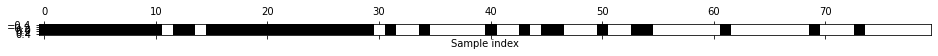

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"
)
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

mask = select.get_support()
# マスクを可視化する
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

### 4.5.3 反復特徴量選択

##### 再帰的特徴量削減（recursive feature elimination: RFE）
すべての特徴量から開始してモデルを作成．そのモデルで最も重要度が低い特徴量を削除．またモデルを作り，最も重要度が低い特徴量を削除．この過程は事前に定めた数の特徴量になるまで繰り返される．機能させるために必要なことは，モデルベース選択の場合同様に，選択に用いるモデルが特徴量の重要性を決定する方法が提供されていること．本書の例ではランダムフォレストを用いる．

Text(0.5, 0, 'Sample index')

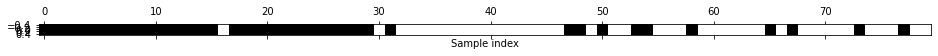

In [30]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)
select.fit(X_train, y_train)
# 選択された特徴量を可視化する
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [31]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))
# RFE内部で用いられたモデル．選択された特徴量で訓練したロジスティック回帰と同じ
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.930
Test score: 0.951


C:\Users\81804\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4.6 専門家知識の利用

Citi Bike data:
<bound method NDFrame.head of starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64>


Text(0, 0.5, 'Rentals')

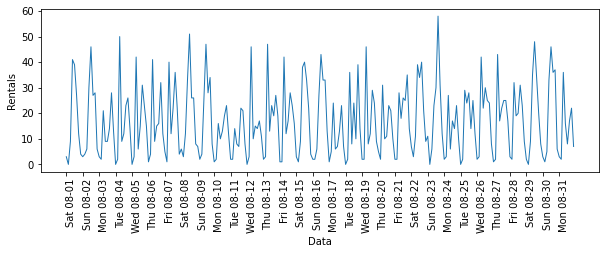

In [34]:
citibike = mglearn.datasets.load_citibike()
print("Citi Bike data:\n{}".format(citibike.head))
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel("Data")
plt.ylabel("Rentals")

##### 時系列に対する予測タスクの立ち回り
過去から学習（learn from the past）と未来を予測する（predict for the future）アプローチをとる．訓練セットとテストセットを分割する際に，ある特定の日までのすべてのデータを訓練セット都市，それ以降をテストセットとする．
##### POSIX時刻
1970年の1月1日0時からの秒数．Unix時刻とも呼ばれる．計算機で日時を格納する際に驚くほどよく用いられている．

C:\Users\81804\AppData\Local\Temp/ipykernel_23464/2770334015.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9


(248,) (248, 1)
Test set R^2: -0.04


<Figure size 432x288 with 0 Axes>

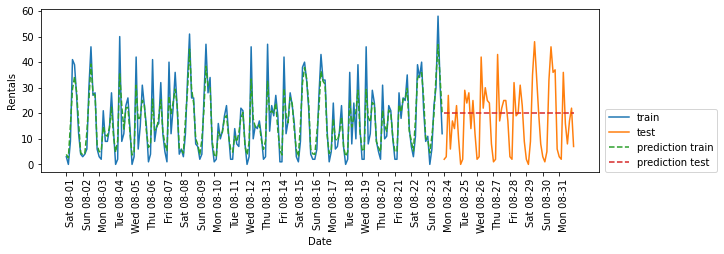

In [38]:
# ターゲット値（レンタル数）を抽出
y = citibike.values
# 時刻を"%s"でPOSIX時刻に変換
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

print(y.shape, X.shape)

# データを訓練セットとテストセットに分割する関数を定義し，モデルを構築
# 結果を可視化する
# 最初の184データポイントを訓練に，残りをテストに使う
n_train = 184

# 与えられた特徴量セットで，回帰器を評価しプロットする関数
def eval_on_features(features, target, regressor):
    # 与えられた特徴量を訓練セットとテストセットに分割
    X_train, X_test = features[:n_train], features[n_train:]
    # ターゲットの配列も分割する
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")
    
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-',
             label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

Test set R^2: 0.60


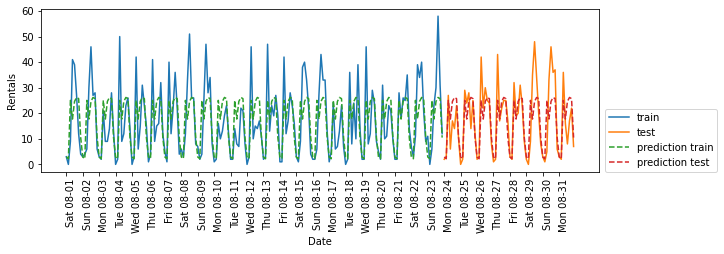

In [40]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test set R^2: 0.84


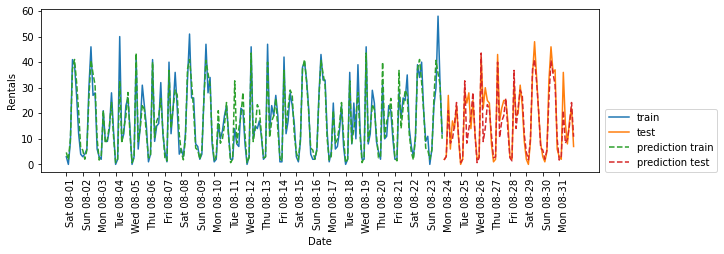

In [44]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test set R^2: 0.13
Test set R^2: 0.62


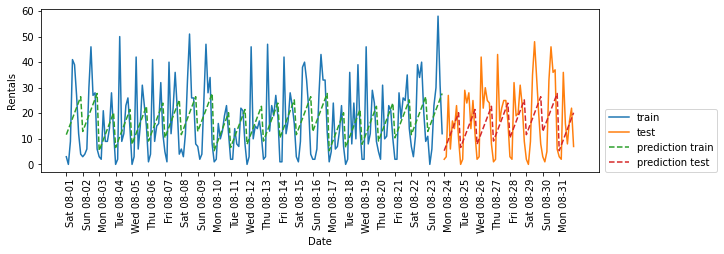

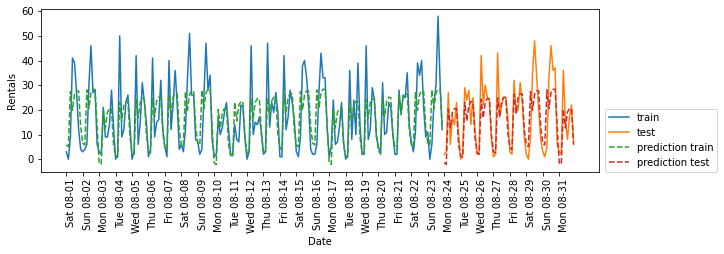

In [45]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

Test set R^2: 0.85


Text(0, 0.5, 'Feature magnitude')

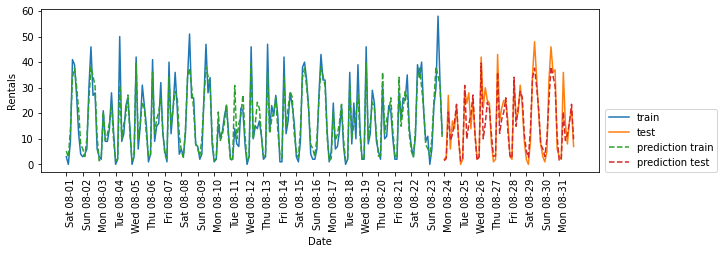

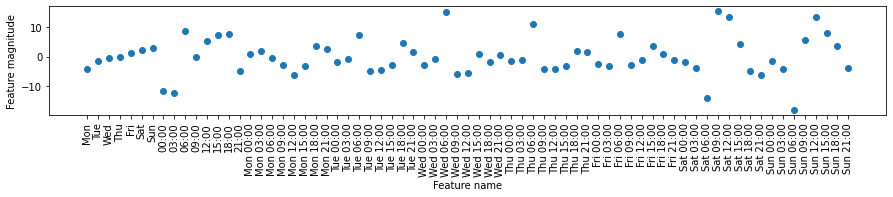

In [47]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

## 4.7 まとめと展望

本章では，さまざまなデータタイプ（特にカテゴリ特徴量）の扱い方を述べ，カテゴリ変数に対するワンホットエンコーディングなどの機械学習アルゴリズムに適したデータ表現の重要性を強調して議論した．新しい特徴量を作ることの重要性についても述べ，専門家の知識を用いてデータから特徴量を作る可能性について説明した．特に，線形モデルはビニングや多項式特徴量や交互作用特徴量の追加の恩恵を受けやすい．より複雑で非線形なモデル，例えばランダムフォレストやSVMは，明示的に特徴量空間を拡張することなくより複雑なタスクを学習することができる．実際に機械学習を応用する上では，どのような特徴量を用いるか，さらにどの特徴量とどの機械学習手法を組み合わせて用いるかが，機械学習応用がうまくいくかどうかを決定する最も重要な要素である．